In [9]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data_train = pd.read_csv('/Users/Jiangyan/Desktop/Kaggle/Titanic/train.csv')
data_train.info()

#data_train.info()可以用来查看缺失值


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


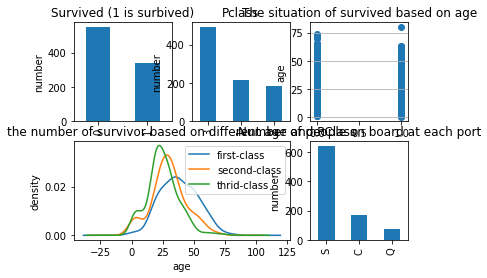

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha = 0.2)

plt.subplot2grid((2,3),(0,0)) 
data_train.Survived.value_counts().plot(kind = "bar")
plt.title(u"Survived (1 is surbived)") # 标题
plt.ylabel(u"number")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"number")
plt.title(u"Pclass")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"The situation of survived based on age")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"the number of survivor based on different age and PClass")
plt.legend((u'first-class', u'second-class',u'thrid-class'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"Number of people on board at each port")
plt.ylabel(u"number")  
plt.show()




<Figure size 432x288 with 0 Axes>

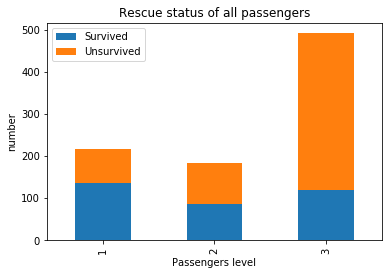

In [18]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Rescue status of all passengers")
plt.xlabel(u"Passengers level") 
plt.ylabel(u"number") 
plt.show()

<Figure size 432x288 with 0 Axes>

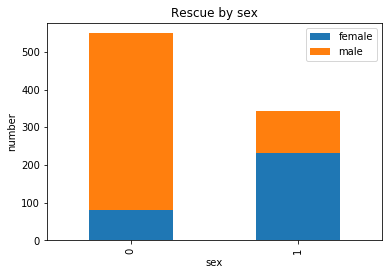

In [4]:
fig = plt.figure()
fig.set(alpha=0.7)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'male': Survived_m, u'female':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title(u"Rescue by sex")
plt.xlabel(u"sex") 
plt.ylabel(u"number")
plt.show()


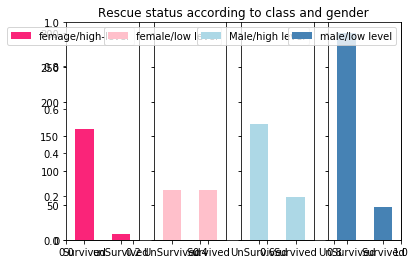

In [5]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"Rescue status according to class and gender")

ax1=fig.add_subplot(141)
#因为survived里面有0有1，所以有两列数据
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"Survived", u"unSurvived"], rotation=0)
ax1.legend([u"femage/high-level"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"UnSurvived", u"Survived"], rotation=0)
plt.legend([u"female/low level"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"UnSurvived", u"Survived"], rotation=0)
plt.legend([u"Male/high level"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"UnSurvived", u"Survived"], rotation=0)
plt.legend([u"male/low level"], loc='best')

plt.show()



<Figure size 432x288 with 0 Axes>

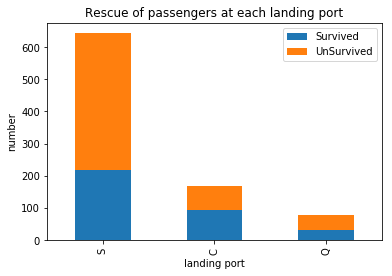

In [10]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived ==1].value_counts()
df = pd.DataFrame({u'Survived': Survived_1, u'UnSurvived': Survived_0})
df.plot(kind='bar', stacked = True)
plt.title(u'Rescue of passengers at each landing port')
plt.xlabel(u'landing port')
plt.ylabel(u'number')
plt.show()

In [14]:
g = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

g = data_train.groupby(['Parch', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                   PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217


In [15]:
# cabin
data_train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
F2             3
D              3
E101           3
C65            2
B28            2
C92            2
F4             2
C126           2
E121           2
E67            2
D33            2
B58 B60        2
F G73          2
B77            2
B5             2
D35            2
E8             2
C93            2
C78            2
D20            2
C2             2
E44            2
D26            2
D36            2
B22            2
              ..
E10            1
C104           1
C103           1
D10 D12        1
D45            1
E31            1
C46            1
B79            1
B50            1
A10            1
C50            1
D9             1
B41            1
A14            1
B37            1
D15            1
T              1
D37            1
C148           1
D50            1
B101           1
B78            1
C90            1
A23            1
C62 C64        1
B102           1
D30            1
B39           

<Figure size 432x288 with 0 Axes>

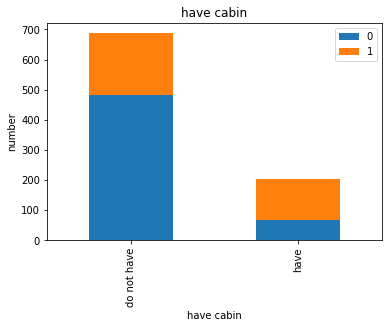

In [17]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'have':Survived_cabin, u'do not have':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"have cabin")
plt.xlabel(u"have cabin") 
plt.ylabel(u"number")
plt.show()

In [ ]:
#用sklearn里面的random forest来拟合一下缺失的年龄数据 （Random Forest是一个用在原始数据中做不同采样，建立多棵 decision tree， 再进行 average等等来降低过拟合现象，提高结果的机器学习算法
from sklearn.ensemble import RandomForestRegressor
# use random forest to fill up the lacked age
def set_missing_ages(df):
    #把已有的数值型特征取出来丢进random forest regressor中
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # 乘客分成已知年龄和未知年龄两部分
    know_age = age_df[age_df.Age.notnull()].as_matrix()
    unknow_age = age_df[age_df.Age.isnull()].as_matrix()
    
    #y目标年龄
    y = known_age[:,0]
    
    #x特征属性值
    X = known_age[:, 1:]
    
    #fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 2000, n_jobs = -1)
    rfr.fit(X,y)
    
    #